<a href="https://colab.research.google.com/github/kavita19/ImageClassification/blob/main/InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

# ***DATA PROCESSING*** 

In [ ]:
(X_train,Y_train), (X_test,Y_test)= K.datasets.cifar10.load_data()

In [ ]:
def preprocess_data(X,Y):
  x = tf.keras.applications.inception_resnet_v2.preprocess_input(X)
  y = K.utils.to_categorical(Y,10)
  return x,y

In [ ]:
X_train, Y_train=preprocess_data(X_train,Y_train)
X_test, Y_test=preprocess_data(X_test,Y_test)


**Transfer Learning**

In [ ]:
!pip install 'h5py<3.0.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
base_model = K.applications.InceptionResNetV2(include_top=False, weights= 'imagenet', input_shape = (299,299,3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

***NEW MODEL***

In [ ]:
inputs=K.Input(shape=(32,32,3))
input=K.layers.Lambda(lambda image: tf.image.resize(image,(299,299)))(inputs)
x=base_model(input,training=False)
x=K.layers.GlobalAveragePooling2D()(x)
x=K.layers.Dense(500,activation='relu')(x)
x=K.layers.Dropout(0.3)(x)
outputs= K.layers.Dense(10,activation='softmax')(x)
model=K.Model(inputs,outputs)


In [ ]:
base_model.trainable=False
optimizer=K.optimizers.Adam()
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["acc"])
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=300,epochs=4,verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 642s 13ms/sample - loss: 0.4050 - acc: 0.8680 - val_loss: 0.2974 - val_acc: 0.9020
Epoch 2/4
50000/50000 [==============================] - 603s 12ms/sample - loss: 0.2904 - acc: 0.9027 - val_loss: 0.2816 - val_acc: 0.9059
Epoch 3/4
50000/50000 [==============================] - 601s 12ms/sample - loss: 0.2633 - acc: 0.9112 - val_loss: 0.2722 - val_acc: 0.9092
Epoch 4/4
50000/50000 [==============================] - 602s 12ms/sample - loss: 0.2470 - acc: 0.9168 - val_loss: 0.2595 - val_acc: 0.9139


In [ ]:
results=model.evaluate(X_test,Y_test)
print ("test loss,test acc:",results)

10000/10000 [==============================] - 103s 10ms/sample - loss: 0.2595 - acc: 0.9139
test loss,test acc: [0.2595486675977707, 0.9139]


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(base_model,to_file='model.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.591003 to fit



In [ ]:
for i, layer in enumerate (base_model.layers):
  print(i,layer.name)
  


0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 conv2d_12
51 conv2d_14
52 conv2d_17
53 batch_normalization_12
54 batch_normalization_14
55 batch_normalization_17
56 activa

***Unfreezing layers*** 

In [ ]:
for layer in base_model.layers[:402]:
    layer.trainable=False 
for layer in base_model.layers[402:]:
    layer.trainable=True

In [ ]:
optimizer=K.optimizers.Adam(1e-5)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc'])
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=300,epochs=4,verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 606s 12ms/sample - loss: 0.2177 - acc: 0.9262 - val_loss: 0.2459 - val_acc: 0.9197
Epoch 2/4
50000/50000 [==============================] - 602s 12ms/sample - loss: 0.2116 - acc: 0.9279 - val_loss: 0.2437 - val_acc: 0.9209
Epoch 3/4
50000/50000 [==============================] - 602s 12ms/sample - loss: 0.2056 - acc: 0.9301 - val_loss: 0.2423 - val_acc: 0.9203
Epoch 4/4
50000/50000 [==============================] - 602s 12ms/sample - loss: 0.2034 - acc: 0.9304 - val_loss: 0.2414 - val_acc: 0.9213


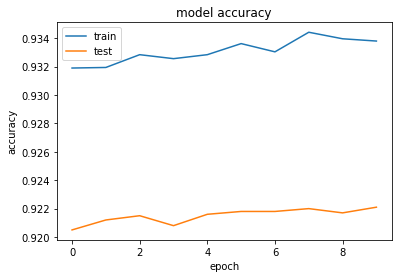

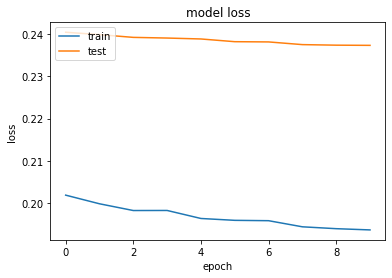

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
optimizer=K.optimizers.Adam(1e-5)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc'])
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=300,epochs=10,verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 609s 12ms/sample - loss: 0.2019 - acc: 0.9319 - val_loss: 0.2404 - val_acc: 0.9205
Epoch 2/10
50000/50000 [==============================] - 604s 12ms/sample - loss: 0.1999 - acc: 0.9319 - val_loss: 0.2398 - val_acc: 0.9212
Epoch 3/10
50000/50000 [==============================] - 604s 12ms/sample - loss: 0.1983 - acc: 0.9328 - val_loss: 0.2392 - val_acc: 0.9215
Epoch 4/10
50000/50000 [==============================] - 605s 12ms/sample - loss: 0.1983 - acc: 0.9326 - val_loss: 0.2390 - val_acc: 0.9208
Epoch 5/10
50000/50000 [==============================] - 604s 12ms/sample - loss: 0.1964 - acc: 0.9328 - val_loss: 0.2388 - val_acc: 0.9216
Epoch 6/10
50000/50000 [==============================] - 604s 12ms/sample - loss: 0.1959 - acc: 0.9336 - val_loss: 0.2382 - val_acc: 0.9218
Epoch 7/10
50000/50000 [==============================] - 604s 12ms/sample - loss: 0.1959 - acc: 0.9330 